### ESMA 3016
### Edgar Acuna
### Lab15: Distribuciones Continuas:  Uniforme y Exponencial
### Octubre 2020
### La Distribucion Uniforme y su aplicacion a simulacion.

$$f(x)=\frac{1}{b-a},$$

para $a<x<b$

In [1]:
from scipy.stats  import uniform,expon,binom
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#El valor de la funcion de densidad uniforme (0,1) en el punto .1
uniform.pdf(.1) 

1.0

In [3]:
#La probabilidad acumulada de la Uniforme U(0,1) hasta .1
uniform.cdf(.1)

0.1

In [4]:
#La probabilidad de una Uniforme U(0,1) entre .4 y .5 es
uniform.cdf(.5)-uniform.cdf(.4)

0.09999999999999998

(array([0.99831073, 1.00106073, 0.99891073, 1.00599073, 1.00341073,
        0.99503072, 0.99682073, 0.99877073, 0.99809073, 1.00361073]),
 array([1.70423565e-07, 1.00000098e-01, 2.00000025e-01, 2.99999952e-01,
        3.99999879e-01, 4.99999806e-01, 5.99999733e-01, 6.99999660e-01,
        7.99999588e-01, 8.99999515e-01, 9.99999442e-01]),
 <a list of 10 Patch objects>)

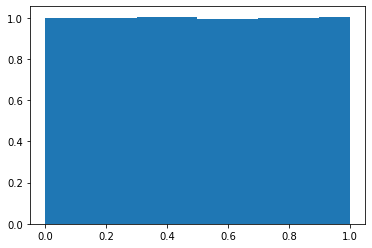

In [5]:
#Simulando 10,000 uniformes (0,1) y haciendo su histograma
plt.hist(uniform.rvs(0,1,1000000),density=True)

In [6]:
#Distribucion Uniforme en un intervalo (a,b)=(2,10)
#Hay que usar los parametros loc=a y scale=b-a
#Hallando la funcion de densidad de la uniforme U(2,10) en el punto x=2.5
uniform.pdf(2.5,loc=2,scale=8)

0.125

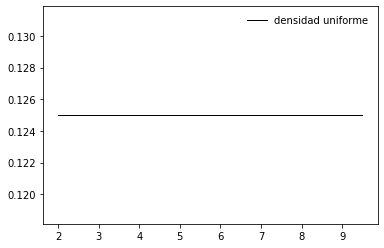

In [7]:
#Grafica de una uniforme U(2,10)
x=np.arange(2,10,.5)
plt.plot(x, uniform.pdf(x,2,8), 'k-', lw=1, label='densidad uniforme')
plt.legend(loc='best', frameon=False)

In [8]:
#Hallando la probabilidad acumulada de la U(2,10) hasta el valor x=6. O sea P(X<6)
uniform.cdf(6,loc=2,scale=8)

0.5

In [9]:
#Hallando el percentil correspondiente a una probabilidad de .9
uniform.ppf(.9,loc=2,scale=8)

9.2

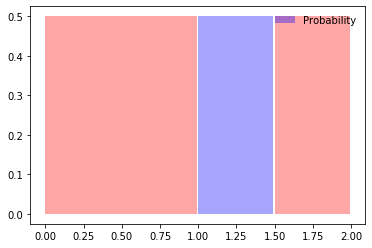

In [10]:
#ejemplo 5.11.  X es U(0,2) se pide calcular P(1<X<3/2)
plt.fill_between(x=np.arange(0,1,0.01), y1= uniform.pdf(np.arange(0,1,0.01),0,2),facecolor='red',alpha=0.35)
plt.fill_between(x=np.arange(1,1.5,0.01), y1= uniform.pdf(np.arange(1,1.5,0.01),0,2),facecolor='blue',alpha=0.35,label='Probability')
plt.fill_between(x=np.arange(1.5,2,0.01), y1= uniform.pdf(np.arange(1.5,2,0.01),0,2),facecolor='red',alpha=0.35)
plt.legend(loc='best',frameon=False)

In [11]:
prob=uniform.cdf(1.5,0,2)-uniform.cdf(1,0,2)
print("the probability is",prob)

the probability is 0.25


### Generando al azar n valores de una Bernoulli con parametro p

In [12]:
#**********************************************************
#Generando al azar n valores de una bernoulli con parametro p
#*********************************************************
def bernoulli(p,m):
    x=[0]*m
    for i in range(m):
        if uniform.rvs(0,1,1)<p:
            x[i]=1 
    return x

In [13]:
bernoulli(.3,20)

[0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0]

In [14]:
#Otra forma
def bernoulli1(p,m):
    b=[uniform.rvs(0,1,1)<p for _ in range(0,m)]
    return [int(x) for x in b]

In [15]:
bernoulli1(.3,20)

[1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0]

### Generando al azar m valores de una binomial con parametros n y p

In [16]:
#************************************************************
#Generando al azar m valores de una binomial con parametros n y p
#************************************************************
#La suma de n Bernoulli's da una binomial(n,p)
def rbinomial(p,n,m):
    x=[0]*m
    for i in range(m): 
        y=0
        for j in range(n):
            y+=sum(bernoulli(p,1))
        x[i]=y    
    return x

In [17]:
import time
start_time = time.time()
rbinomial(.5,6,10000)
print("--- %s seconds ---" % (time.time() - start_time))
rbinomial(.5,6,20)

--- 2.122196674346924 seconds ---


[3, 1, 5, 4, 2, 3, 6, 6, 3, 4, 3, 3, 5, 5, 3, 5, 3, 2, 2, 1]

In [18]:
#Otra forma
def rbinom1(p,n,m):
    b=[bernoulli1(p,n) for _ in range(0,m)]
    return np.sum(b,axis=1)

In [19]:
start_time = time.time()
rbinom1(.5,6,10000)
print("--- %s seconds ---" % (time.time() - start_time))
rbinom1(.5,6,20)

--- 2.0863685607910156 seconds ---


array([2, 3, 5, 3, 4, 2, 5, 2, 4, 1, 1, 2, 4, 4, 2, 3, 2, 2, 1, 1])

In [20]:
start_time = time.time()
binom.rvs(6,.5,size=10000)
print("--- %s seconds ---" % (time.time() - start_time))
binom.rvs(6,.5,size=20)

--- 0.0010311603546142578 seconds ---


array([4, 5, 3, 3, 3, 3, 4, 2, 6, 3, 4, 4, 2, 1, 3, 5, 3, 4, 3, 5])

### Distribucion exponencial
$$f(x)=\frac{1}{\theta}e^{-\frac{x}{\theta}},$$

para $x>0$, tambien $\theta>0$

In [21]:
#***************************************************************************
#simulando una muestra de 200 tiempos de espera en un banco
#se esta considerando que el tiempo de espera promedio es 10 minutos
#los tiempos estan dados en minutos
#******************************************************************************* 
tiempos=expon.rvs(scale=10,size=200)

In [22]:
tiempos

array([9.57301824e-01, 1.64851066e+01, 6.83620064e+00, 1.43967173e+01,
       1.53632883e+01, 2.71401295e+00, 9.20946976e+00, 1.78031888e+01,
       2.15173805e+00, 1.20305724e+01, 7.78432513e+00, 2.28449666e+00,
       9.81430227e+00, 6.24830139e-01, 7.68658586e-01, 1.56751005e+00,
       3.82242577e+00, 3.74596985e+01, 1.02345573e+01, 7.94685134e-01,
       1.04139547e+01, 6.14934067e+00, 1.86637653e+00, 4.57607843e+00,
       2.42000334e+00, 2.78079398e+00, 4.13356055e-01, 5.25776163e+00,
       1.31369244e+01, 4.75302095e+00, 1.66706890e+01, 2.12422511e-01,
       9.54242918e-01, 1.43721101e+01, 1.02040999e+00, 5.80358615e+00,
       3.50540741e+01, 2.88845767e+00, 3.52320450e+00, 5.78320042e+00,
       1.74351174e+00, 1.59891973e+00, 1.90629368e+01, 1.42467254e+01,
       3.51396905e+00, 1.24160433e+01, 9.17221080e+00, 1.47159703e+01,
       1.80594183e+00, 6.27255657e-01, 2.63113944e+00, 5.98532142e-01,
       4.07308083e+00, 4.64047972e-01, 5.24141120e+00, 2.25010042e+00,
      

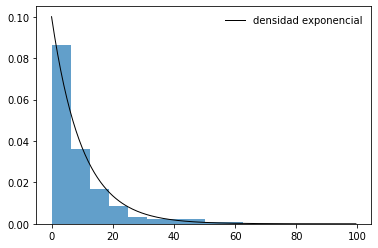

In [23]:
#Generando un histograma de los datos pero de tal manera que el area total sea 1
x=np.arange(0,100,.5)
#Haciendo una comparacion grafica
fig, ax = plt.subplots(1, 1)
ax.hist(tiempos, density = True,alpha=.7)
ax.plot(x, expon.pdf(x,scale=10), 'k-', lw=1, label='densidad exponencial')
ax.legend(loc='best', frameon=False)

Cual es la probabilidad de que se tenga que esperar mas de 15 minutos para ser atendido?
Area bajo la curva mas alla de 15

$$P(x>15)=\int_{15}^{\infty}\frac{1}{10}e^{-\frac{x}{10}}dx$$

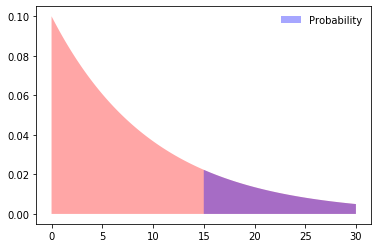

In [24]:
plt.fill_between(x=np.arange(0,30,0.01), y1= expon.pdf(np.arange(0,30,0.01),scale=10),facecolor='red',alpha=0.35)
plt.fill_between(x=np.arange(15,30,0.01), y1= expon.pdf(np.arange(15,30,0.01),scale=10),facecolor='blue',alpha=0.35,label='Probability')
plt.legend(loc='best', frameon=False)

In [25]:
#Calculando aproximadamente la integral
def integrando(x):
    return np.exp(-x/10)/10
quad(integrando,15,np.Inf)

(0.22313016014842987, 2.2730397098404664e-10)

#### El primer valor es el resultado de la integral y el segundo es el error del resultado

In [26]:
#Haciendolo por complemento=1-area hasta 15 y usando la densidad exponencial
1-expon.cdf(15,scale=10)

0.2231301601484298

In [27]:
#Estimando la probabilidad
probest=len(tiempos[tiempos>15])/float(200)
probest

0.185

In [28]:
#X=Tiempo de la duracion de la compoente , que es una Exponencial con parametro 100
#P(50<X<100)

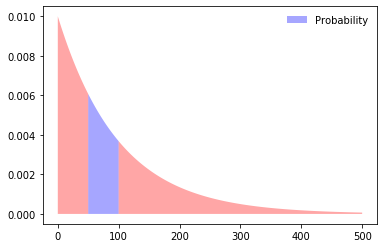

In [29]:
plt.fill_between(x=np.arange(0,50,0.01), y1= expon.pdf(np.arange(0,50,0.01),scale=100),facecolor='red',alpha=0.35)
plt.fill_between(x=np.arange(50,100,0.01), y1= expon.pdf(np.arange(50,100,0.01),scale=100),facecolor='blue',alpha=0.35,label='Probability')
plt.fill_between(x=np.arange(100,500,0.01), y1= expon.pdf(np.arange(100,500,0.01),scale=100),facecolor='red',alpha=0.35)
plt.legend(loc='best', frameon=False)

In [30]:
proba=expon.cdf(100,scale=100)-expon.cdf(50,scale=100)
proba

0.2386512185411911